<a href="https://colab.research.google.com/github/Michalinh0/DS2022/blob/main/waveenergyconverters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Przygotowanie danych oraz bibliotek do działania notatnika

Import bibliotek


In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
import lightgbm as lgb
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neural_network import MLPRegressor

 Pobranie i wstępna obróbka danych

In [101]:
data_adelaide = pd.read_csv("https://raw.githubusercontent.com/Michalinh0/DS2022/main/sources/Adelaide_Data.csv")
data_sydney = pd.read_csv("https://raw.githubusercontent.com/Michalinh0/DS2022/main/sources/Sydney_Data.csv")
data_perth = pd.read_csv("https://raw.githubusercontent.com/Michalinh0/DS2022/main/sources/Perth_Data.csv")
data_tasmania = pd.read_csv("https://raw.githubusercontent.com/Michalinh0/DS2022/main/sources/Tasmania_Data.csv")

strOfNames = []

for i in range (16):
  strOfNames.append("X" + str(i+1))
for i in range (16):
  strOfNames.append("Y" + str(i+1))
for i in range (16):
  strOfNames.append("P" + str(i+1))
strOfNames.append("Total")

data_adelaide.columns = strOfNames
data_sydney.columns = strOfNames
data_perth.columns = strOfNames
data_tasmania.columns = strOfNames

Przygotowanie wektora wejściowego

In [102]:
lista = []

for i in range(16):
  arg1, arg2 = "X" + str(i+1) , "Y" + str(i+1)
  lista.append(arg1)
  lista.append(arg2)


print(lista)

['X1', 'Y1', 'X2', 'Y2', 'X3', 'Y3', 'X4', 'Y4', 'X5', 'Y5', 'X6', 'Y6', 'X7', 'Y7', 'X8', 'Y8', 'X9', 'Y9', 'X10', 'Y10', 'X11', 'Y11', 'X12', 'Y12', 'X13', 'Y13', 'X14', 'Y14', 'X15', 'Y15', 'X16', 'Y16']


# Adelaide

Macierz korelacji

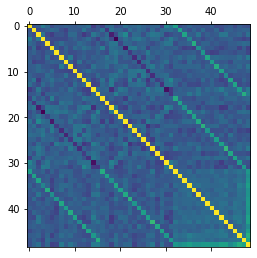

In [103]:
corr = data_adelaide.corr()

plt.matshow(corr)

Liniowa regresja

In [104]:
x = data_adelaide[lista].values.reshape(-1, 1)[:1000]
y = data_adelaide["Total"].values.reshape(-1, 1)[:1000]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.1)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Ocenianie jakości modelu

In [105]:
y_pred = model.predict(X_test)

print("Średni procent błędu:")
print(str((np.sqrt(mean_squared_error(y_test, y_pred))/np.mean(y))*100)+" %")
print(np.sqrt(mean_squared_error(y_test, y_pred)))

Średni procent błędu:
2.573496451199342 %
35261.74370009585


Biblioteka xgboost

In [106]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 1, learning_rate = 0.15,
                max_depth = 5, alpha = 0.2, n_estimators = 50)

xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, preds))

print(str((rmse/np.mean(y))*100)+" %")
print("RMSE: %f" % (rmse))

2.6483464798270058 %
RMSE: 36287.329931


Biblioteka multi-layer perceptron

In [107]:
regr = MLPRegressor(random_state = 1, max_iter = 5000, learning_rate_init = 0.05).fit(X_train,y_train)
y_pred=regr.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,y_pred)))

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


36140.94165984645


Biblioteka lightgbm

In [108]:
model = lgb.LGBMRegressor(learning_rate=0.05,max_depth=5,random_state=40)
model.fit(X_train,y_train)

model.predict(X_test)

print("Średni procent błędu:")
print(str((np.sqrt(mean_squared_error(y_test, y_pred))/np.mean(y))*100)+" %")
print(np.sqrt(mean_squared_error(y_test, y_pred)))

Średni procent błędu:
2.637662671921822 %
36140.94165984645
Training accuracy 0.0824
Testing accuracy -0.0339


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Sydney

Macierz korelacji

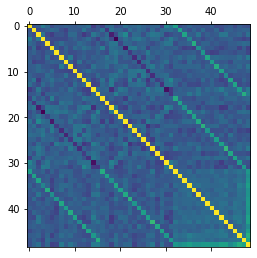

In [109]:
corr = data_adelaide.corr()

plt.matshow(corr)

Liniowa regresja

In [110]:
x = data_sydney[lista].values.reshape(-1, 1)[:1000]
y = data_sydney["Total"].values.reshape(-1, 1)[:1000]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.1)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Ocenianie jakości modelu

In [111]:
y_pred = model.predict(X_test)

print("Średni procent błędu:")
print(str((np.sqrt(mean_squared_error(y_test, y_pred))/np.mean(y))*100)+" %")
print(np.sqrt(mean_squared_error(y_test, y_pred)))

Średni procent błędu:
1.401692469315813 %
20842.87648666208


Biblioteka xgboost

In [112]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 1, learning_rate = 0.15,
                max_depth = 5, alpha = 0.2, n_estimators = 50)

xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, preds))

print(str((rmse/np.mean(y))*100)+" %")
print("RMSE: %f" % (rmse))

1.4378054983520878 %
RMSE: 21379.869743


Biblioteka multi-layer perceptron

In [113]:
regr = MLPRegressor(random_state = 1, max_iter = 5000, learning_rate_init = 0.05).fit(X_train,y_train)
y_pred=regr.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,y_pred)))

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


22759.1718775815


Biblioteka lightgbm

In [114]:
model = lgb.LGBMRegressor(learning_rate=0.05,max_depth=5,random_state=40)
model.fit(X_train,y_train)

model.predict(X_test)

print("Średni procent błędu:")
print(str((np.sqrt(mean_squared_error(y_test, y_pred))/np.mean(y))*100)+" %")
print(np.sqrt(mean_squared_error(y_test, y_pred)))

Średni procent błędu:
1.5305641641682597 %
22759.1718775815
Training accuracy 0.0700
Testing accuracy -0.0467


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Perth

Macierz korelacji

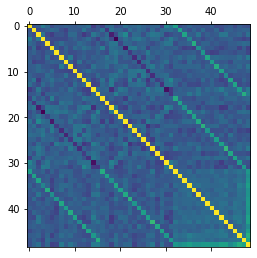

In [115]:
corr = data_adelaide.corr()

plt.matshow(corr)

Liniowa regresja

In [116]:
x = data_perth[lista].values.reshape(-1, 1)[:1000]
y = data_perth["Total"].values.reshape(-1, 1)[:1000]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.1)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Ocenianie jakości modelu

In [117]:
y_pred = model.predict(X_test)

print("Średni procent błędu:")
print(str((np.sqrt(mean_squared_error(y_test, y_pred))/np.mean(y))*100)+" %")
print(np.sqrt(mean_squared_error(y_test, y_pred)))

Średni procent błędu:
3.273670124647504 %
46600.86629575926


Biblioteka xgboost

In [118]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 1, learning_rate = 0.15,
                max_depth = 5, alpha = 0.2, n_estimators = 50)

xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, preds))

print(str((rmse/np.mean(y))*100)+" %")
print("RMSE: %f" % (rmse))

3.2997542154719337 %
RMSE: 46972.174700


Biblioteka multi-layer perceptron

In [119]:
regr = MLPRegressor(random_state = 1, max_iter = 5000, learning_rate_init = 0.05).fit(X_train,y_train)
y_pred=regr.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,y_pred)))

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


48541.02024862688


Biblioteka lightgbm

In [120]:
model = lgb.LGBMRegressor(learning_rate=0.05,max_depth=5,random_state=40)
model.fit(X_train,y_train)

model.predict(X_test)

print("Średni procent błędu:")
print(str((np.sqrt(mean_squared_error(y_test, y_pred))/np.mean(y))*100)+" %")
print(np.sqrt(mean_squared_error(y_test, y_pred)))

Średni procent błędu:
3.40996424399733 %
48541.02024862688
Training accuracy 0.0662
Testing accuracy -0.0107


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Tasmania

Macierz korelacji

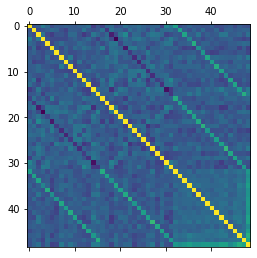

In [121]:
corr = data_adelaide.corr()

plt.matshow(corr)

Liniowa regresja

In [122]:
x = data_tasmania[lista].values.reshape(-1, 1)[:1000]
y = data_tasmania["Total"].values.reshape(-1, 1)[:1000]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.1)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Ocenianie jakości modelu

In [123]:
y_pred = model.predict(X_test)

print("Średni procent błędu:")
print(str((np.sqrt(mean_squared_error(y_test, y_pred))/np.mean(y))*100)+" %")
print(np.sqrt(mean_squared_error(y_test, y_pred)))

Średni procent błędu:
1.9161034779983563 %
71246.00655924677


Biblioteka xgboost

In [124]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 1, learning_rate = 0.15,
                max_depth = 5, alpha = 0.2, n_estimators = 50)

xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, preds))

print(str((rmse/np.mean(y))*100)+" %")
print("RMSE: %f" % (rmse))

1.9525114621869517 %
RMSE: 72599.755723


Biblioteka multi-layer-perceptron

In [125]:
regr = MLPRegressor(random_state = 1, max_iter = 5000, learning_rate_init = 0.05).fit(X_train,y_train)
y_pred=regr.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,y_pred)))

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


76894.53440527871


Biblioteka lightgbm

In [126]:
model = lgb.LGBMRegressor(learning_rate=0.05,max_depth=5,random_state=40)
model.fit(X_train,y_train)

model.predict(X_test)

print("Średni procent błędu:")
print(str((np.sqrt(mean_squared_error(y_test, y_pred))/np.mean(y))*100)+" %")
print(np.sqrt(mean_squared_error(y_test, y_pred)))

Średni procent błędu:
2.068016046492312 %
76894.53440527871
Training accuracy 0.0827
Testing accuracy -0.0283


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
